In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
import keras

## Loading and Splitting the Data

The initial data split is:
* Training - 60000
* Testing - 10000 (~14.3% of the entire dataset)

To add a validation set, the following split will be:
* Training - 50000 (83.3% of training set, 71.4% of entire dataset)
* Dev/Vali - 10000 (16.7% of the training set, 14.3% of entire dataset)
* Testing - 10000 (~14.3% of entire dataset)

In [2]:
# loading dataset and splitting dataset
# Split ~70%, ~15%, ~15% split
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.16666, random_state=42)

In [3]:
# Print to show there are 50,000 images (32 by 32 images for a dimensionality of 1024)
print("Image Training Data Shape" , X_train.shape)

# Print to show there are 10,000 images (32 by 32 images for a dimensionality of 1024)
print("Image Validation Data Shape" , X_val.shape)

# Print to show there are 10,000 labels (integers from 0-9)
print("Label Data Shape", X_test.shape)

Image Training Data Shape (50000, 28, 28)
Image Validation Data Shape (10000, 28, 28)
Label Data Shape (10000, 28, 28)


The purpose of splitting the data into three sets are:
* Training set - what the model is fit on to learn features and patterns in the data 
* Developmenent/Validation Set - validates the training models performance and allows you to adjust parameters accordingly and thus reduces the chances of the model overfitting as the model is being ran on data it hasn't seen before
* Test Set - used after the model has been trained, and provides an unbiased final model performance metric (accuracy, precision, recall, f1)

In [4]:
# viewing the dataset 
def view_image(image, label):
    plt.figure(figsize=(20,4))
    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        plt.imshow(image[i], cmap="Greys")
        plt.title('Training: %i\n' % label[i], fontsize = 20)

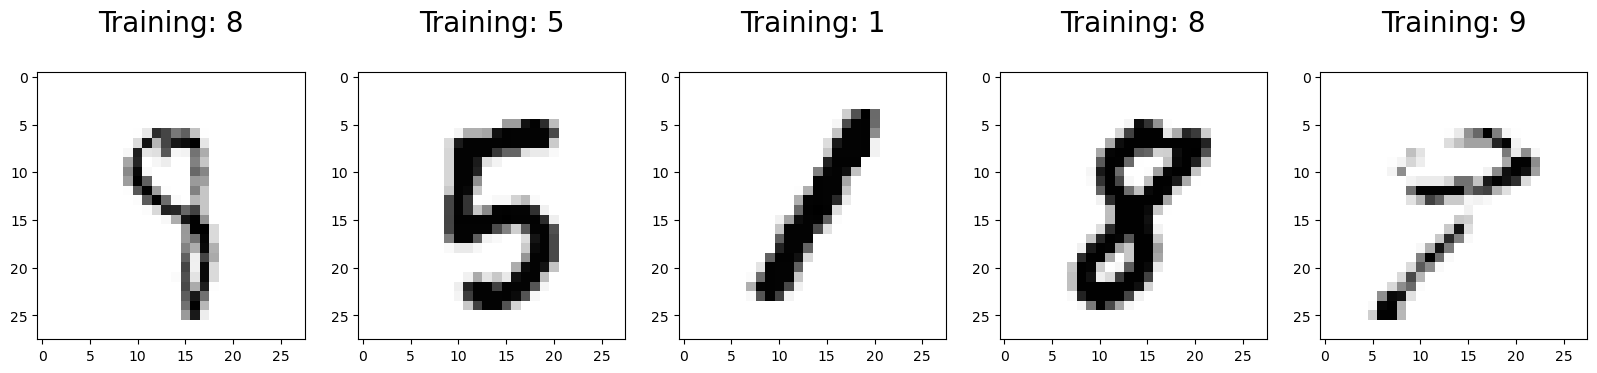

In [5]:
view_image(X_train, y_train)

Text(0.5, 1.0, '2')

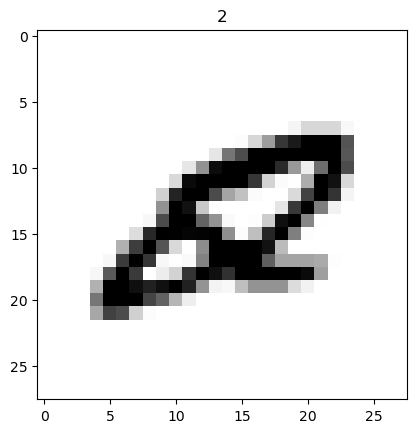

In [6]:
# View a single image 
img_index = 25
plt.imshow(X_train[img_index,:,:], cmap="Greys")
plt.title(y_train[img_index])

In [7]:
# reducing the dimensions of each array 
X_train = X_train.reshape((-1, X_train.shape[1] * X_train.shape[2]))

X_val = X_val.reshape((-1, X_val.shape[1] * X_val.shape[2]))

X_test = X_test.reshape((-1, X_test.shape[1] * X_test.shape[2]))

In [8]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 784)
(10000, 784)
(10000, 784)


In [9]:
# normalise the data 
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

In [10]:
print(X_train.shape, y_train.shape)

(50000, 784) (50000,)


## Default Random Forest Model

In [11]:
# define the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# view parameters, use default settings 
print(rf_clf)

RandomForestClassifier(random_state=42)


In [12]:
#Training the model using the training subset
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
print("Default Random Forest score:",rf_clf.score(X_val,y_val))

Default Random Forest score: 0.9682


## Tuning the Random Forest Model

There are many different parameters that can be modified within the Random Forest model to improve the models performance.

In this example, the max_depth parameter will be tuned, as it helps determine the levels of nodes that are allowed in each tree within the forest. The more nodes should mean a more precise model, however, this could make the model more prone to overfitting. Therefore, finding the optimal max depth is important when tuning a decision tree ensemble model.

Another important parameter is n_estimators. This parameter controls the number of of tree within the forest. This is important as it can also lead to overfitting if too many are present.

In [14]:
accuracy_score_train = []
accuracy_score_val = []

p_depth = range(2, 21)

for d in p_depth:
    print(f"Tuning at depth {d}: ")

    #Initialise and train model with a given max depth
    tune_rf_clf = RandomForestClassifier(max_depth=d,random_state=42)
    tune_rf_clf.fit(X_train,y_train)

    #Get the score using training and validation set
    training = tune_rf_clf.score(X_train,y_train)
    validation = tune_rf_clf.score(X_val,y_val)

    #Appending the score to empty list
    accuracy_score_train.append(training)
    accuracy_score_val.append(validation)

Tuning at depth 2: 
Tuning at depth 3: 
Tuning at depth 4: 
Tuning at depth 5: 
Tuning at depth 6: 
Tuning at depth 7: 
Tuning at depth 8: 
Tuning at depth 9: 
Tuning at depth 10: 
Tuning at depth 11: 
Tuning at depth 12: 
Tuning at depth 13: 
Tuning at depth 14: 
Tuning at depth 15: 
Tuning at depth 16: 
Tuning at depth 17: 
Tuning at depth 18: 
Tuning at depth 19: 
Tuning at depth 20: 


Best performance reached on the validation set at a depth of: 19


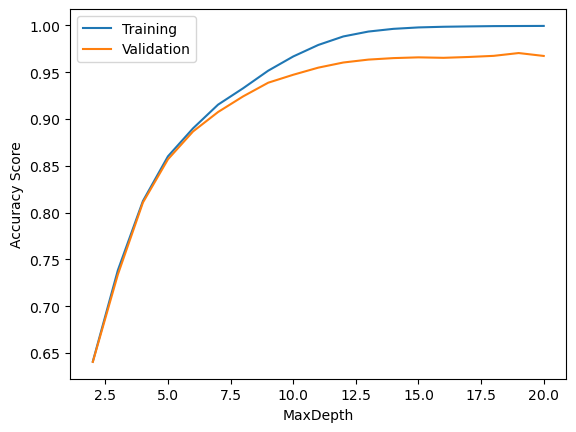

In [16]:
plt.plot(p_depth, accuracy_score_train, label="Training")
plt.plot(p_depth, accuracy_score_val, label="Validation")
plt.legend()
plt.xlabel("MaxDepth")
plt.ylabel("Accuracy Score")

#Gets the depth corresponding to that accuracy score
best_depth_val = p_depth[np.argmax(accuracy_score_val)]
print('Best performance reached on the validation set at a depth of:', best_depth_val)

## Final Model on the Testing Subset

From tuning the model at multiple max depths values it was determined that the best model is achieved at a depth of 19. As the model has a small increase in accuracy at this particular point as shown from the line graph above. Though, the graph shows that the model is possibly not done converting and that the max depth tuning could be extended, given the small increase in the models accuracy as depth 19 it doesnt appear that any significant increases will be occuring

Furthermore, the training dataset consistently achieves better accuracy scores once the depth is greater than 5. However, this is expected as the model is trying to fit to this exact data and is an example of overfitting compared to the validation data.

In [17]:
#Initialising the random forest with the best parameters
final_rf = RandomForestClassifier(max_depth=19,random_state=42)
final_rf.fit(X_train,y_train)

#Getting predictions for all the test data
y_pred = final_rf.predict(X_test)

### Correlation Matrix 

- The number that was the hardest to predict was:  5
- The model mistook 4 for a 9 the most out of any specific guess.
- The model was the best at predicting the number 1


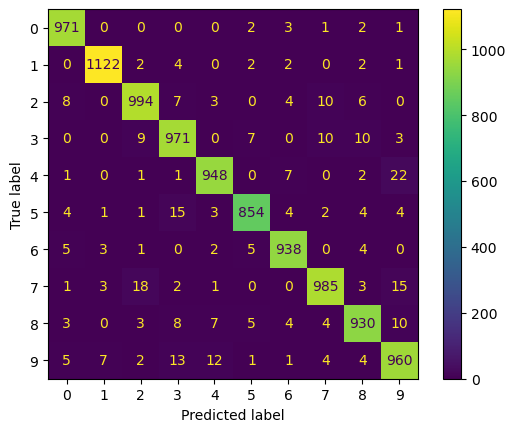

In [18]:
#Generating the confusion matrix comparing the test set labels with the predicted labels
corr_img_pred = confusion_matrix(y_test,y_pred)

#Converting the matrix into a format that can be plotted
matrix_plot = ConfusionMatrixDisplay(confusion_matrix=corr_img_pred,display_labels=[0,1,2,3,4,5,6,7,8,9])
matrix_plot.plot()

#Gets a list of correct guesses
correct = [corr_img_pred[i][j] for i in range(10) for j in range(10) if j == i ]

#Gets a list of all the incorrect guesses
incorrect = [corr_img_pred[i][j] for i in range(10) for j in range(10) if j != i ]

#Finds the class that had the least number of correct guesses
worst_class_correct = correct.index(min(correct))
best_class_correct = correct.index(max(correct))

#Finds the pair of classes that were predicted wrong the most times
worst_true,worst_pred = np.where(corr_img_pred == max(incorrect))


print("- The number that was the hardest to predict was: ",worst_class_correct)
print(f"- The model mistook {int(worst_true)} for a {int(worst_pred)} the most out of any specific guess.")
print("- The model was the best at predicting the number",best_class_correct)

### Performance Metrics 

There are a many different ways to judge whether a model performed well or not. In this example, accuracy, precision, recall, and f1 scores will be looked at.

For each classification, there are 4 different outcomes that can happen, true positive, true negative, false positive, false negative. For simplicity, assume there are 2 possible classes, X and Y. In this specific case, the true value is X:

* True positive (TP): When the model correctly predicts X **IS** X
* True negative (TN): When the model correctly predicts X **IS NOT** Y
* False positive (FP): When the model incorrectly predicts X **IS** Y
* False negative (FN): When the model incorrectly predicts X **IS NOT** X

Accuracy: This score is the ratio of true predictions compared to all predictions.
$$Accuracy = \frac{TP + TN} {TP + FN + TN + FP}$$

Precision: This is the ratio of true positives compared to all positive predictions.
$$Precision = \frac{TP} {TP + FP}$$

Recall: This is the ratio of true positives compared to all actual positive answers.
$$Recall = \frac{TP} {TP + FN}$$

F1-Score: This is the harmonic mean of the precision and recall metrics
$$F1 = \frac{2PR} {P + R}$$

In [19]:
#Calculates different accuracy scores
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average="macro")
recall = recall_score(y_test,y_pred,average="macro")
f1 = f1_score(y_test,y_pred,average="macro")

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1-Score:",f1)

Accuracy: 0.9673
Precision: 0.9672107054645821
Recall: 0.9670259808359173
F1-Score: 0.9670921805119784
